# Overall
```
- 프로젝트명 : 커머스 데이터 분석
- 프로젝트유형 : 데이터 EDA, 고객 행동 데이터 분석
- 시나리오 : 고객 행동 데이터 분석을 통해 CRM 전략 수립

- 분석방향 :
    - 고객 행동 분석 - 온라인 / 오프라인 관점
    - 고객 행동 분석 - 주문채널 관점
    - 고객 행동 분석 - 카테고리 관점
    - 고객 행동 분석 - 고객 특성 파악하기 - 주문량 & 주문 금액 관점
    - 고객 행동 분석 - 고객 특성 파악하기 - 주문 주기 관점
    - 고객 행동 분석 - 고객 특성 파악하기 - 이탈 시점 관점

- Meta data
    - master_id : 고객 식별을 위한 고유 ID
    - order_channel : 고객의 전체 구매 채널 정보 (온라인/오프라인 여부 포함)
    - last_order_channel : 고객이 마지막으로 구매한 채널
    - first_order_date : 고객의 첫 구매일
    - last_order_date : 고객의 마지막 구매일 (온라인 또는 오프라인 중 더 최근)
    - last_order_date_online : 고객의 마지막 온라인 주문일
    - last_order_date_offline : 고객의 마지막 오프라인 주문일
    - order_num_total_ever_online : 고객의 온라인 누적 구매 횟수
    - order_num_total_ever_offline : 고객의 오프라인 누적 구매 횟수
    - customer_value_total_ever_offline : 고객의 오프라인 누적 구매 금액
    - customer_value_total_ever_online : 고객의 온라인 누적 구매 금액
    - interested_in_categories_12 : 고객이 최근 12개월간 관심을 보인 제품 카테고리 목록
```

<!--
- 원본 파일 https://colab.research.google.com/drive/16nZw2I3Y0Uz7RaA_is2a06RmtxEjps91  
- 전달받은 파일 https://colab.research.google.com/drive/13WxN9bMTzroLKLTtPbsuljXTNhcd5suk
-->


# 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np

flo_data = pd.read_csv('/content/flo_data_20k.csv')

In [ ]:
flo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
flo_data.head(1)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]


## Editing Data

In [ ]:
flo_data['order_num_total'] = flo_data['order_num_total_ever_offline'] + flo_data['order_num_total_ever_online']
flo_data['customer_value_total'] = flo_data['customer_value_total_ever_offline'] + flo_data['customer_value_total_ever_online']


In [ ]:
## date 컬럼 데이터 형변환
## 'date' 명을 포함하는 컬럼만 추출
date_columns = flo_data.columns[flo_data.columns.str.contains('date')]

## to_datetime 을 적용
flo_data[date_columns] = flo_data[date_columns].apply(pd.to_datetime)

In [ ]:
flo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [ ]:
## interested_in_categories_12 컬럼 수정 (튀르키에 > 영어)

category_mapping = {
    'AKTIFCOCUK': 'ACTIVE CHILD',
    'AKTIFSPOR':  'ACTIVE SPORTS',
    'COCUK': 'CHILD',
    'ERKEK': 'MAN',
    'KADIN': 'WOMAN',
}

In [ ]:
for idx, categories in enumerate(flo_data['interested_in_categories_12']):
  for turkish, eng in category_mapping.items() :
    categories = categories.replace(turkish, eng) # interested_in_categories_12 에서 category_mapping items 기준으로 맵핑
  flo_data.loc[idx, 'interested_in_categories_12_eng'] = categories # flo_data 데이터프레임에 새롭게 할당


In [ ]:
flo_data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,interested_in_categories_12_eng
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,[WOMAN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,"[MAN, CHILD, WOMAN, ACTIVE SPORTS]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,"[MAN, WOMAN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,"[ACTIVE CHILD, CHILD]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,[ACTIVE SPORTS]


In [ ]:
flo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

# 고객 행동 분석 - 온라인 / 오프라인 관점

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


## Online vs Offline

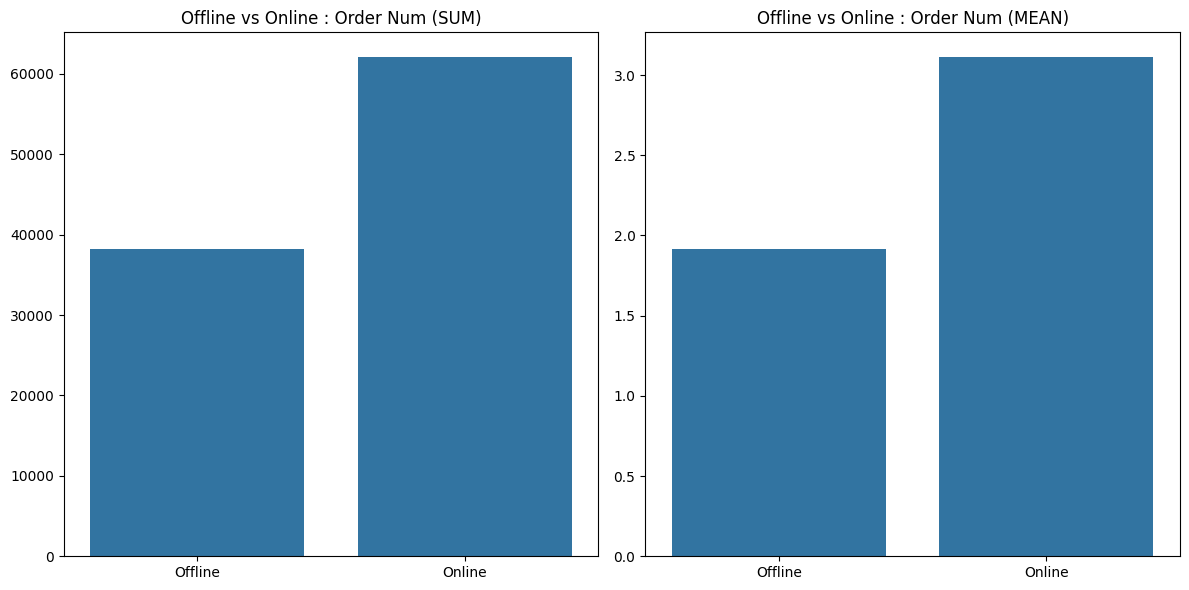

In [ ]:
## 주문 수량 총합과 평균 모두 online 이 우세하는 경향을 확인

## sum
off_sum_val = sum(flo_data['order_num_total_ever_offline'].values)
on_sum_val = sum(flo_data['order_num_total_ever_online'].values)

## mean
off_mean_val = np.mean(flo_data['order_num_total_ever_offline'].values)
on_mean_val = np.mean(flo_data['order_num_total_ever_online'].values)

x = ['Offline', 'Online']
y_sum = [off_sum_val, on_sum_val]
y_mean = [off_mean_val, on_mean_val]

plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
sns.barplot(x = x, y = y_sum)
plt.title("Offline vs Online : Order Num (SUM)")

plt.subplot(1,2,2)
sns.barplot(x = x, y = y_mean)
plt.title("Offline vs Online : Order Num (MEAN)")

plt.tight_layout()
plt.show()

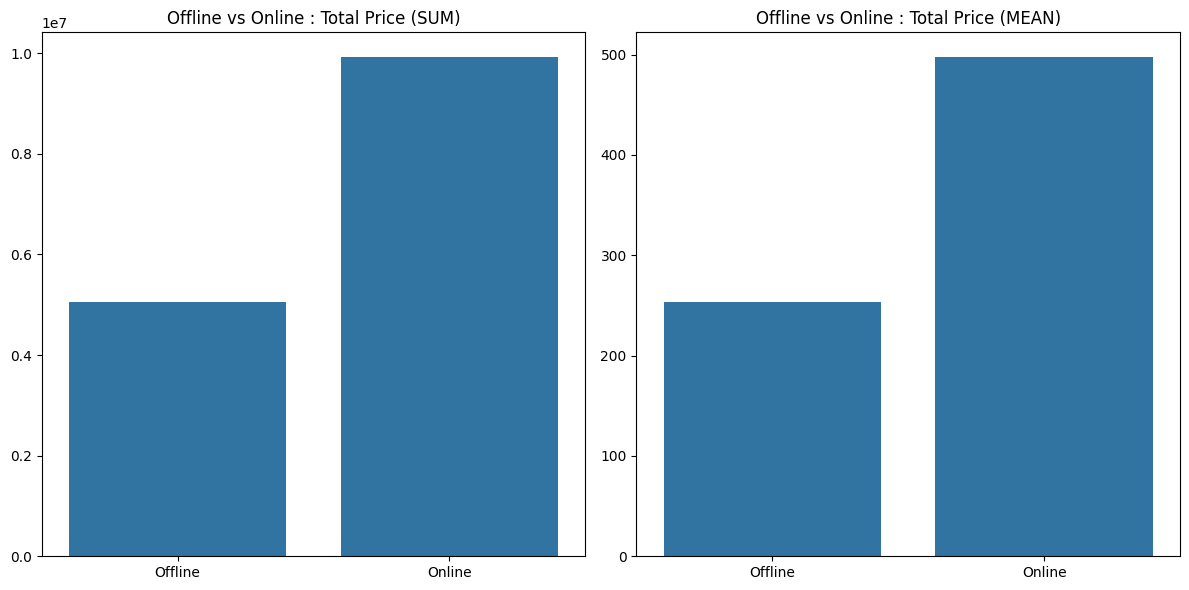

In [ ]:
## 주문 금액 총액과 평균 측면에서도 Online 이 높은 경향을 보이는 것을 파악

## sum
off_sum_val = sum(flo_data['customer_value_total_ever_offline'].values)
on_sum_val = sum(flo_data['customer_value_total_ever_online'].values)

## mean
off_mean_val = np.mean(flo_data['customer_value_total_ever_offline'].values)
on_mean_val = np.mean(flo_data['customer_value_total_ever_online'].values)

x = ['Offline', 'Online']
y_sum = [off_sum_val, on_sum_val]
y_mean = [off_mean_val, on_mean_val]

plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
sns.barplot(x = x, y = y_sum)
plt.title("Offline vs Online : Total Price (SUM)")

plt.subplot(1,2,2)
sns.barplot(x = x, y = y_mean)
plt.title("Offline vs Online : Total Price (MEAN)")

plt.tight_layout()
plt.show()

In [ ]:
## 마지막 주문일 기준 일별 데이터 비교
offline_series = flo_data.groupby('last_order_date_offline')['master_id'].count().to_frame()
online_series = flo_data.groupby('last_order_date_online')['master_id'].count().to_frame()

## filtering
offline_series = offline_series[offline_series.index > '2020']
online_series = online_series[online_series.index > '2020']

In [ ]:
offline_series

,master_id
last_order_date_offline,
2020-01-02,27
2020-01-03,23
2020-01-04,48
2020-01-05,37
2020-01-06,30
...,...
2021-05-24,66
2021-05-25,57
2021-05-26,69


### 일별 주문량 트랜드

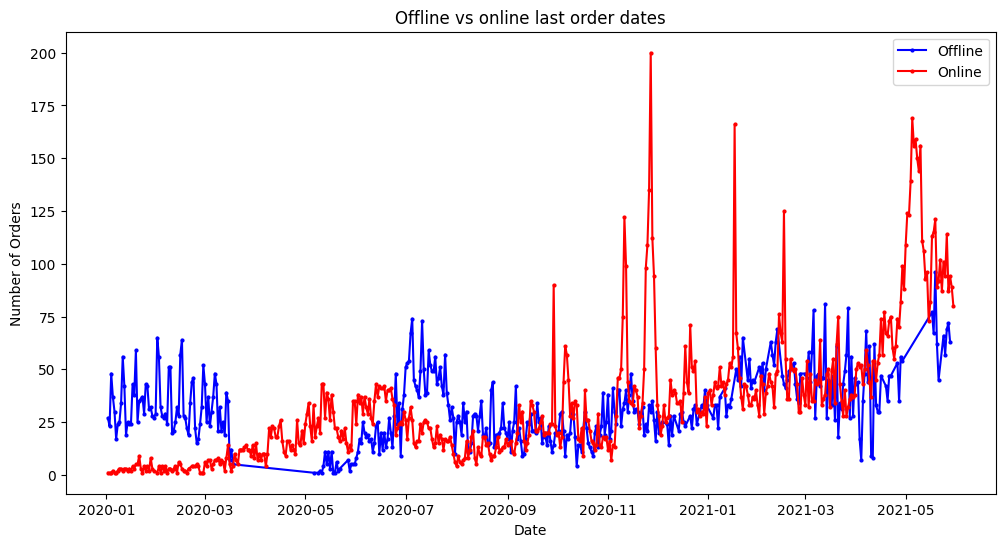

In [ ]:
## 일자별로 그릴 경우 그래프가 촘촘하여 패턴 파악 등이 어려울 수 있어, 월별로 리셈플 후 진행

plt.figure(figsize = (12, 6))
plt.plot(offline_series.index, offline_series.values, label = 'Offline', marker = 'o', linestyle = '-', markersize = 2, color = 'blue')
plt.plot(online_series.index, online_series.values, label = 'Online', marker = 'o', linestyle = '-', markersize = 2, color = 'red')

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Offline vs online last order dates')
plt.legend()
plt.show()

In [ ]:
# resample
online_series = online_series.resample('M').sum()
offline_series = offline_series.resample('M').sum()

<ipython-input-17-e81b780b35f1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  online_series = online_series.resample('M').sum()
<ipython-input-17-e81b780b35f1>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offline_series = offline_series.resample('M').sum()


### 월 기준 주문량 트랜드

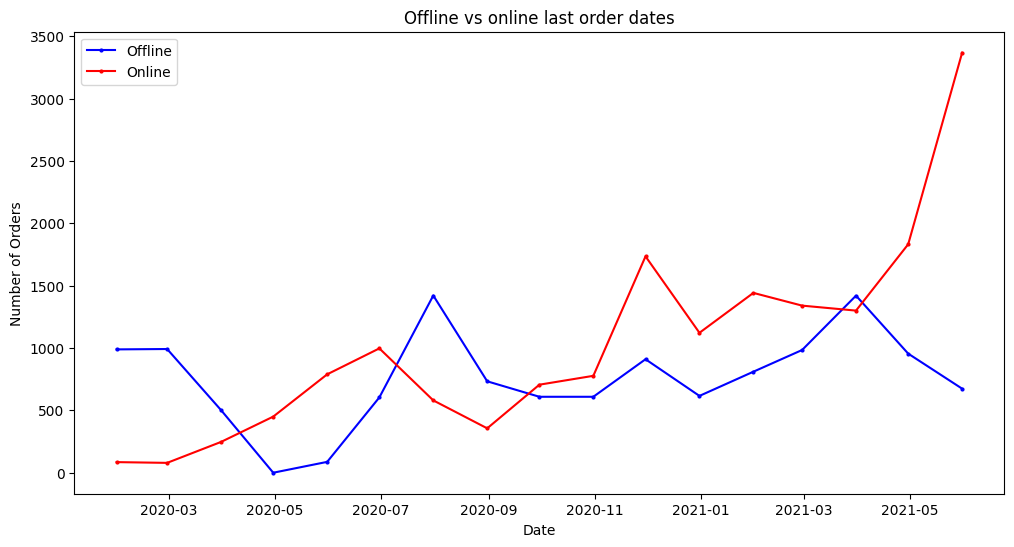

In [ ]:
# resample 이후 그래프
# 2020년 10월 이후 online 주문 수 증가 , 2021년 4월 부 급격히 증가하는 양상을 보였습니다.
# 동시에 2021년 4월 부 offline 의 주문 수 저하가 진행되고 있음을 확인하였습니다.

plt.figure(figsize = (12, 6))
plt.plot(offline_series.index, offline_series.values, label = 'Offline', marker = 'o', linestyle = '-', markersize = 2, color = 'blue')
plt.plot(online_series.index, online_series.values, label = 'Online', marker = 'o', linestyle = '-', markersize = 2, color = 'red')

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Offline vs online last order dates')
plt.legend()
plt.show()

### 요일별 주문 트랜드

In [ ]:
## 요일 기준으로도 집계 후 분석

flo_data['last_order_day_offline'] = pd.to_datetime(flo_data['last_order_date_offline']).dt.day_name()
flo_data['last_order_day_online'] = pd.to_datetime(flo_data['last_order_date_online']).dt.day_name()

In [ ]:
flo_data.head(3)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,interested_in_categories_12_eng,last_order_day_offline,last_order_day_online
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,[WOMAN],Friday,Sunday
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,"[MAN, CHILD, WOMAN, ACTIVE SPORTS]",Friday,Tuesday
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,"[MAN, WOMAN]",Sunday,Friday


In [ ]:
offline_order_day_counts = flo_data.groupby('last_order_day_offline')['master_id'].count().to_frame()
online_order_day_counts = flo_data.groupby('last_order_day_online')['master_id'].count().to_frame()

In [ ]:
## index 조정
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
offline_order_day_counts = offline_order_day_counts.reindex(days_of_week)
online_order_day_counts = online_order_day_counts.reindex(days_of_week)


In [ ]:
online_order_day_counts = online_order_day_counts.reset_index().rename(columns = {'master_id' : 'order_count'})
offline_order_day_counts = offline_order_day_counts.reset_index().rename(columns = {'master_id' : 'order_count'})


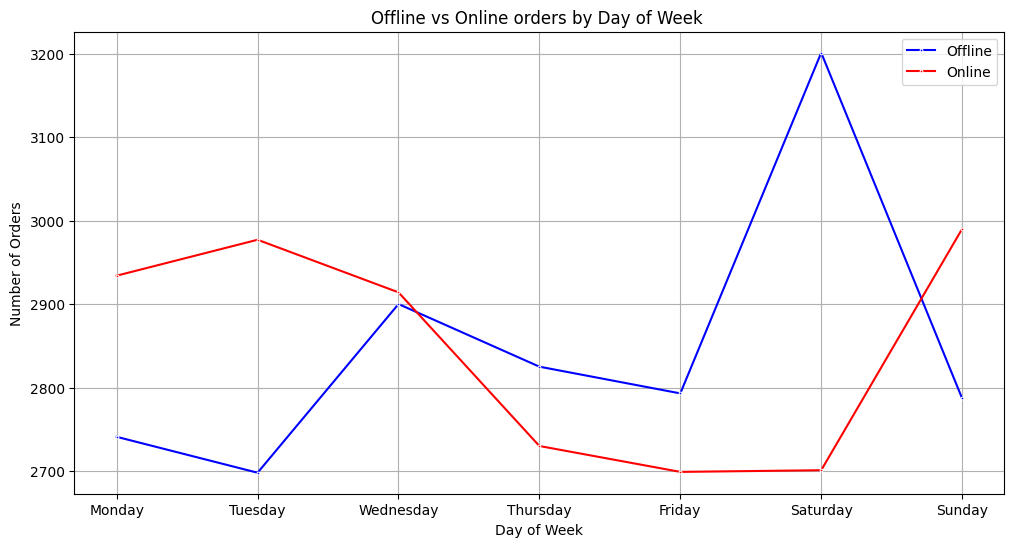

In [ ]:
## 일요일부터 온라인 주문 수가 급격하게 증가
## 토요일부터 오프라인 주문 수가 급격하게 증가
## 금요일의 경우 온/오프라인 모두 낮은 주문수를 보였으며
## 화요일의 경우 오프라인 주문 수 가장 낮은 수를 보이는 것을 확인

# 오프라인 주문량이 가장 높은 토요일에 부스트업을 위한 액션 수행 시 효과적인 매출 창출이 가능할 것으로 사료됩니다
# 온라인 주문량은 일, 월, 화, 수 기간 높게 유지되는 추세를 보였으며, 부스트업을 위해서는 해당 기간을 우선적으로 검토해봄이 좋을 것 같습니다.
plt.figure(figsize = (12, 6))
sns.lineplot(x = offline_order_day_counts['last_order_day_offline'], y = offline_order_day_counts['order_count'], label = 'Offline', marker = 'o', linestyle = '-', markersize = 2, color = 'blue')
sns.lineplot(x = online_order_day_counts['last_order_day_online'], y = online_order_day_counts['order_count'], label = 'Online', marker = 'o', linestyle = '-', markersize = 2, color = 'red')

plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.title('Offline vs Online orders by Day of Week ')
plt.show()

# 고객 행동 분석 - 주문채널 관점


## 주문 채널 1 - 채널별 주문량 비교

In [ ]:
## 주문 채널 1 - 시간 경과에 따른 주문량

channel_list = flo_data['last_order_channel'].unique()
print(channel_list)

['Offline' 'Mobile' 'Android App' 'Desktop' 'Ios App']


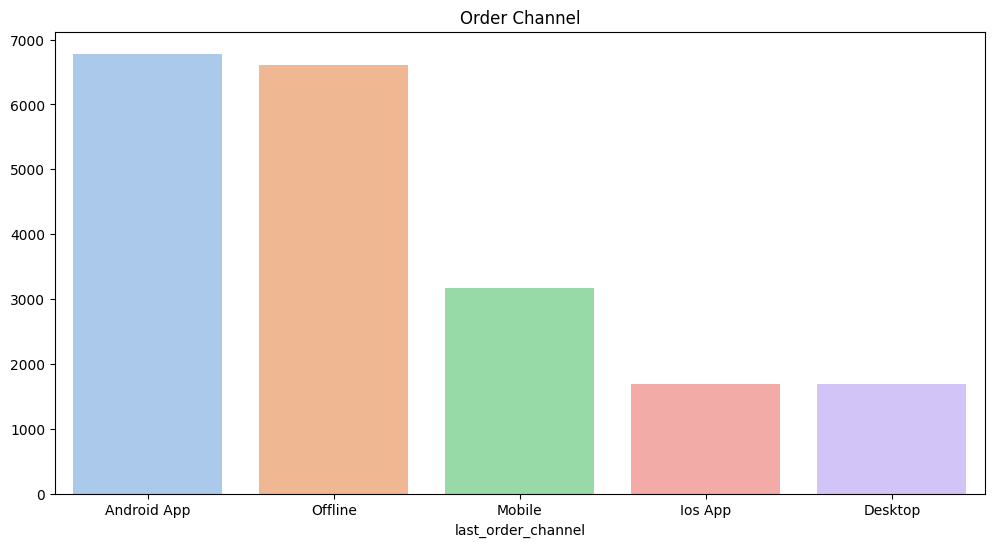

In [ ]:
order_channerl_counts = flo_data['last_order_channel'].value_counts()

x = order_channerl_counts.index
y = order_channerl_counts.values

plt.figure(figsize = (12, 6))

sns.barplot(x = x, y = y, palette = 'pastel', hue = x)
plt.title("Order Channel")
plt.show()

### 주문 채널 1 - 채널별 시기별 주문량 변화 추이

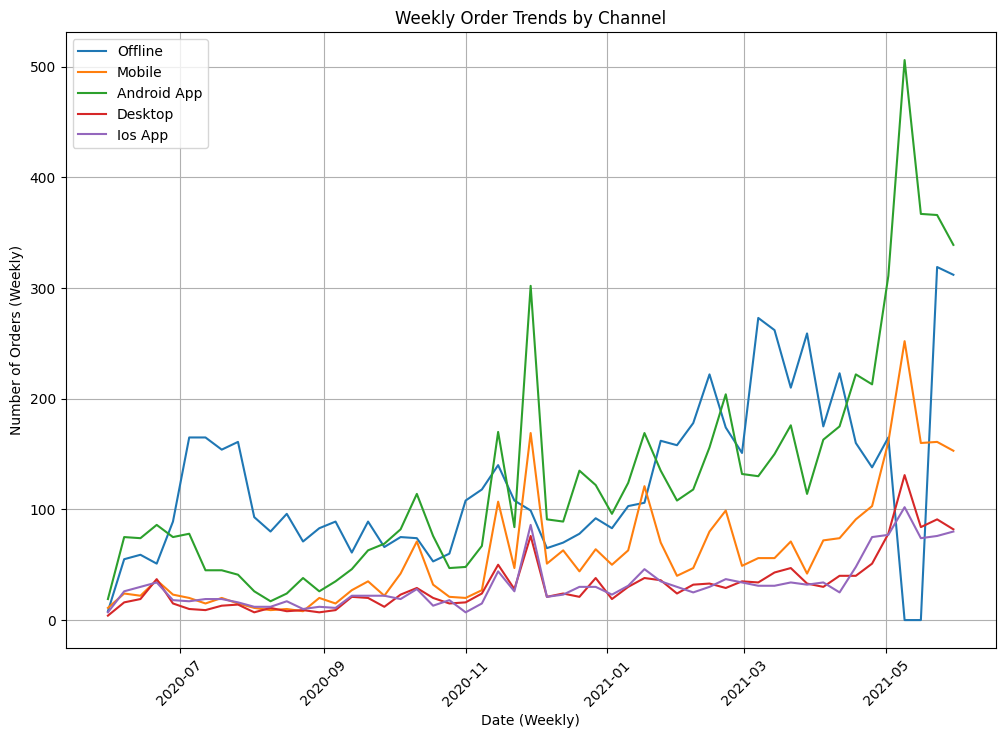

In [ ]:
## 채널별로도 시간에 따라 강세가 변화하는지 확인을 진행
## 초창기에는 오프라인이 강세였으나, 차츰 Android 쪽으로 주문 물량이 이동하는 트랜드를 확인

channel_groups  = flo_data.groupby('last_order_channel')

plt.figure(figsize = (12, 8))
for channel in channel_list :
    channel_data = channel_groups.get_group(channel) # get_group : groupby 된 데이터의 특정 그룹에 대한 데이터를 가져올 수 있는 메서드

    if channel == 'Offline' :
        channel_data = channel_data.set_index('last_order_date_offline')
        channel_weekly = channel_data.resample('W')['master_id'].count()
    else :
        channel_data = channel_data.set_index("last_order_date_online")
        channel_weekly = channel_data.resample('W')['master_id'].count()

    plt.plot(channel_weekly.index, channel_weekly.values, label = channel)

plt.xlabel('Date (Weekly)')
plt.ylabel("Number of Orders (Weekly)")
plt.title("Weekly Order Trends by Channel")
plt.legend()
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()


# 고객 행동 분석 - 카테고리 관점


- 채널별로 어떤 카테고리들이 가장 많이 판매되었을까

In [ ]:
## 마지막 주문 채널 리스트
channel_list

array(['Offline', 'Mobile', 'Android App', 'Desktop', 'Ios App'],
      dtype=object)

In [ ]:
## 어떤 카테고리들이 있는지 파악

category_list = []
for categories in flo_data['interested_in_categories_12_eng'] :
    categories = categories[1:-1] # 대괄호 제거
    categories = categories.split(', ') # 콤마 기준 나누기

    for category in categories :
        category = category.strip()

        if category not in category_list :
            category_list.append(category)

print(category_list)

['WOMAN', 'MAN', 'CHILD', 'ACTIVE SPORTS', 'ACTIVE CHILD', '']


In [ ]:
channel_category_count = {}

for channel in channel_list :
    channel_category_count[channel] = {category : 0 for category in category_list}

channel_category_count

{'Offline': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Mobile': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Android App': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Desktop': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0},
 'Ios App': {'WOMAN': 0,
  'MAN': 0,
  'CHILD': 0,
  'ACTIVE SPORTS': 0,
  'ACTIVE CHILD': 0,
  '': 0}}

In [ ]:
channel_category_data = flo_data[['last_order_channel', 'interested_in_categories_12_eng']]

for index, row in channel_category_data.iterrows() :
    channel = row['last_order_channel']
    categories = row['interested_in_categories_12_eng'][1:-1]

    for category in categories.split(', ') :
        category = category.strip()
        channel_category_count[channel][category] += 1


In [ ]:
channel_category_count

{'Offline': {'WOMAN': 3093,
  'MAN': 2115,
  'CHILD': 1485,
  'ACTIVE SPORTS': 2871,
  'ACTIVE CHILD': 1074,
  '': 496},
 'Mobile': {'WOMAN': 1065,
  'MAN': 806,
  'CHILD': 563,
  'ACTIVE SPORTS': 1344,
  'ACTIVE CHILD': 502,
  '': 472},
 'Android App': {'WOMAN': 2320,
  'MAN': 2573,
  'CHILD': 1506,
  'ACTIVE SPORTS': 3397,
  'ACTIVE CHILD': 1330,
  '': 751},
 'Desktop': {'WOMAN': 574,
  'MAN': 548,
  'CHILD': 293,
  'ACTIVE SPORTS': 774,
  'ACTIVE CHILD': 246,
  '': 224},
 'Ios App': {'WOMAN': 551,
  'MAN': 600,
  'CHILD': 310,
  'ACTIVE SPORTS': 818,
  'ACTIVE CHILD': 285,
  '': 192}}

In [ ]:
channel_category_count_t = pd.DataFrame(channel_category_count).T

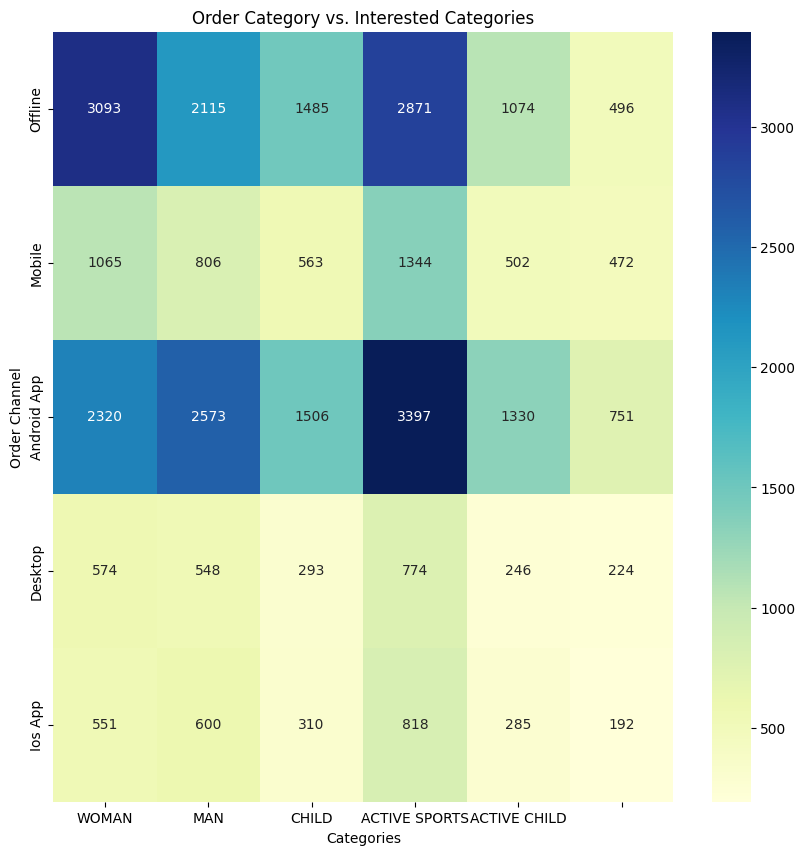

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(channel_category_count_t, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.title('Order Category vs. Interested Categories')
plt.xlabel('Categories')
plt.ylabel('Order Channel')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
## 카테고리가 묶여 있는 상태로 (직전 상태에서는 풀어헤쳐서 진행했다면) 채널별 counting 을 진행

nested = flo_data[['last_order_channel', 'interested_in_categories_12_eng']].value_counts().to_frame()
nested = nested.reset_index() # multi index 를 푸는 작업
nested = nested.rename(columns = {0 : 'count'})
nested = nested.sort_values(by = ['last_order_channel', 'count'], ascending = [True, False]).reset_index(drop = True)


Text(0.5, 1.0, 'Top 5 Interested Categories by Order Channel')

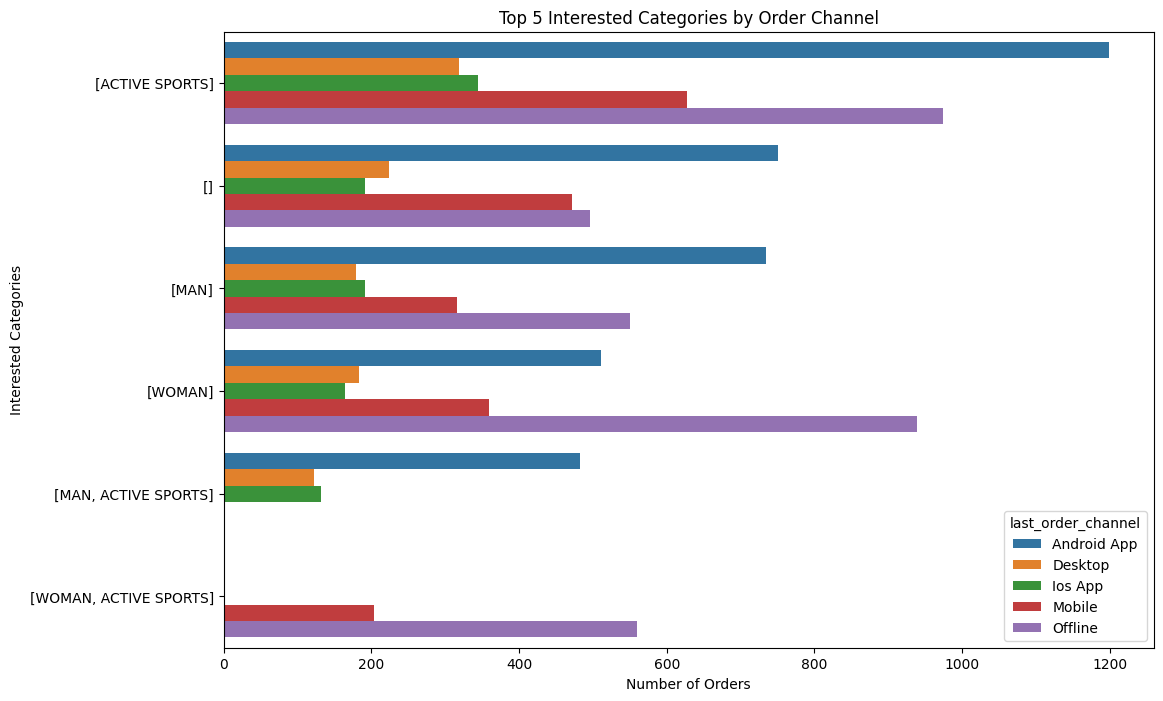

In [ ]:
## 채널별 상위 다섯개 항목만 추출
top_categories_by_channel = nested.groupby('last_order_channel').head(5)
plt.figure(figsize = (12, 8))

sns.barplot(x = 'count', y = 'interested_in_categories_12_eng', data = top_categories_by_channel, hue = 'last_order_channel')
plt.xlabel('Number of Orders')
plt.ylabel('Interested Categories')
plt.title('Top 5 Interested Categories by Order Channel')


In [ ]:
# 딕셔너리 구조로 틀 생성
categories_count = {category : 0 for category in category_list}
print(categories_count)

{'WOMAN': 0, 'MAN': 0, 'CHILD': 0, 'ACTIVE SPORTS': 0, 'ACTIVE CHILD': 0, '': 0}


In [ ]:
for categories in flo_data['interested_in_categories_12_eng'] :

    ## 리스트 구조로 변경
    categories = categories[1:-1]
    categories = categories.split(', ')

    for category in categories :
        categories_count[category] += 1

In [ ]:
print(categories_count)

{'WOMAN': 7603, 'MAN': 6642, 'CHILD': 4157, 'ACTIVE SPORTS': 9204, 'ACTIVE CHILD': 3437, '': 2135}


<ipython-input-40-e3d69cbdd1ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y =counts , palette = 'pastel')


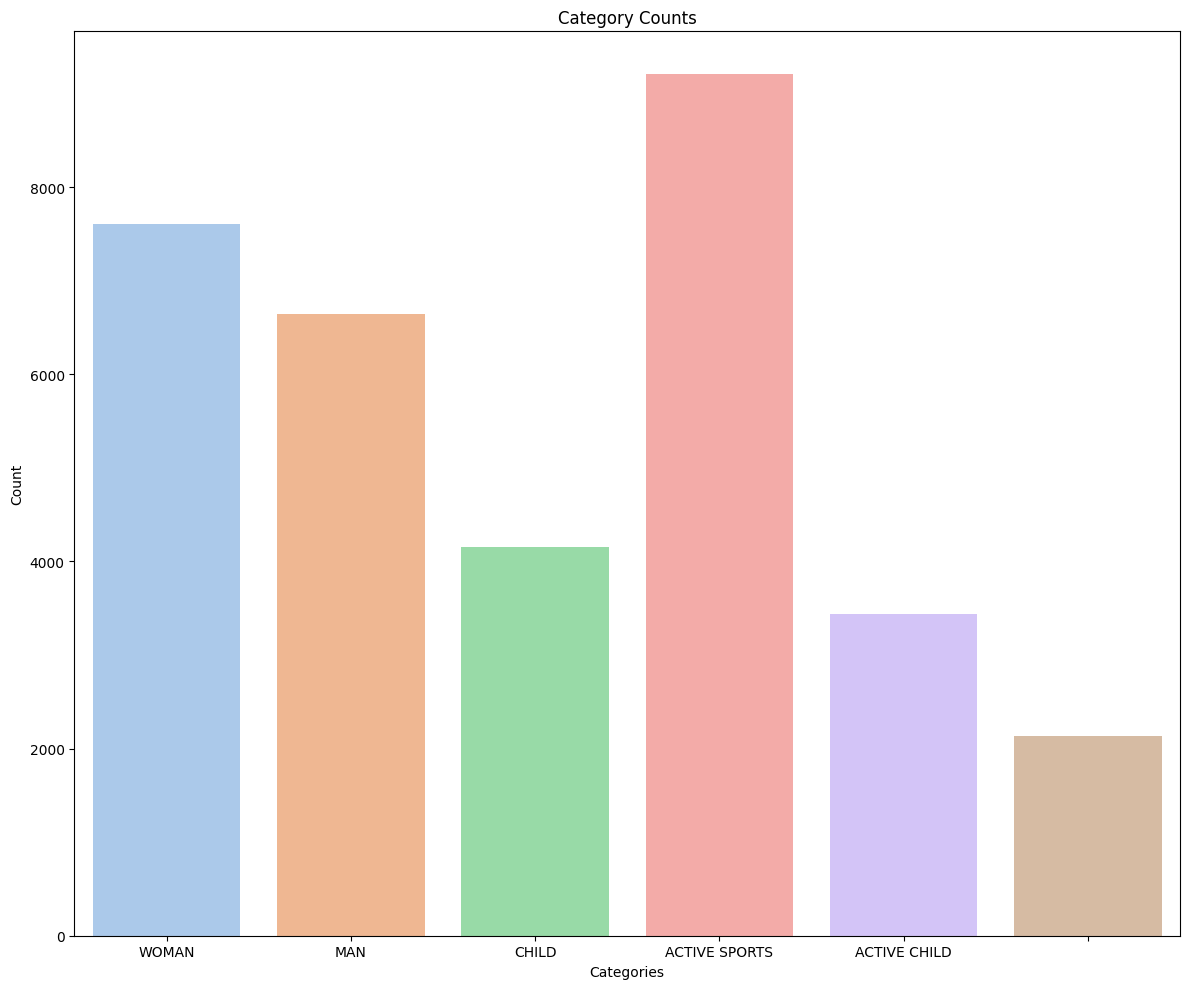

In [ ]:
categories = list(categories_count.keys())
counts = list(categories_count.values())

plt.figure(figsize = (12, 10))
sns.barplot(x = categories, y =counts , palette = 'pastel')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title("Category Counts")
plt.tight_layout()
plt.show()

<ipython-input-41-498a298cc4bf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y = counts, palette = 'pastel')


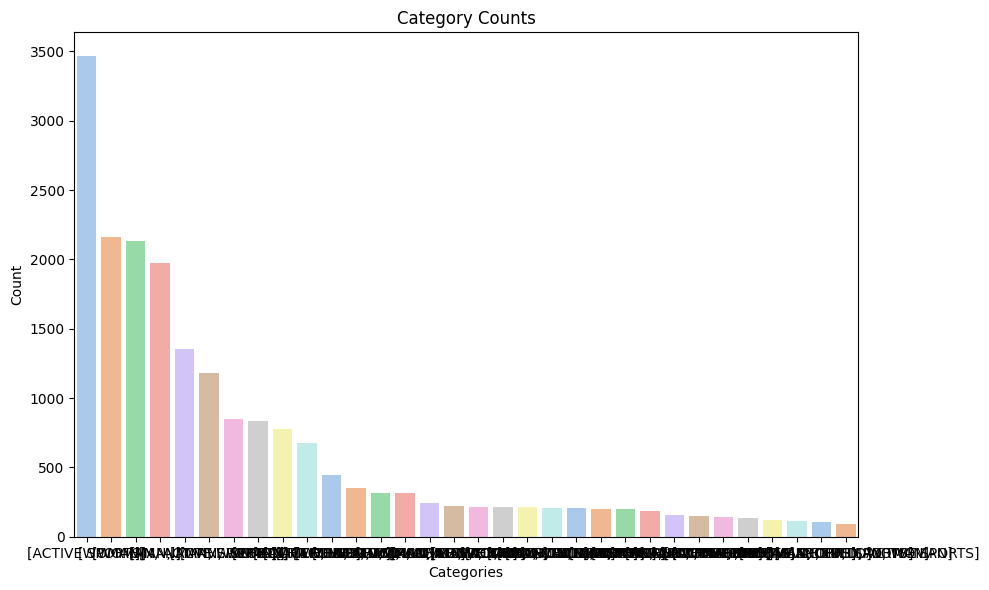

In [ ]:
## interested_in_categories_12_eng 항목이 너무 많아서 top 15 기준으로 sort 이후 다시 진행
nested_categories_count = flo_data['interested_in_categories_12_eng'].value_counts()

categories = list(nested_categories_count.index)
counts = list(nested_categories_count.values)

plt.figure(figsize = (10, 6))
sns.barplot(x = categories, y = counts, palette = 'pastel')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title("Category Counts")
plt.tight_layout()
plt.show()




<ipython-input-42-e8e691f00beb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y = counts, palette = 'pastel')


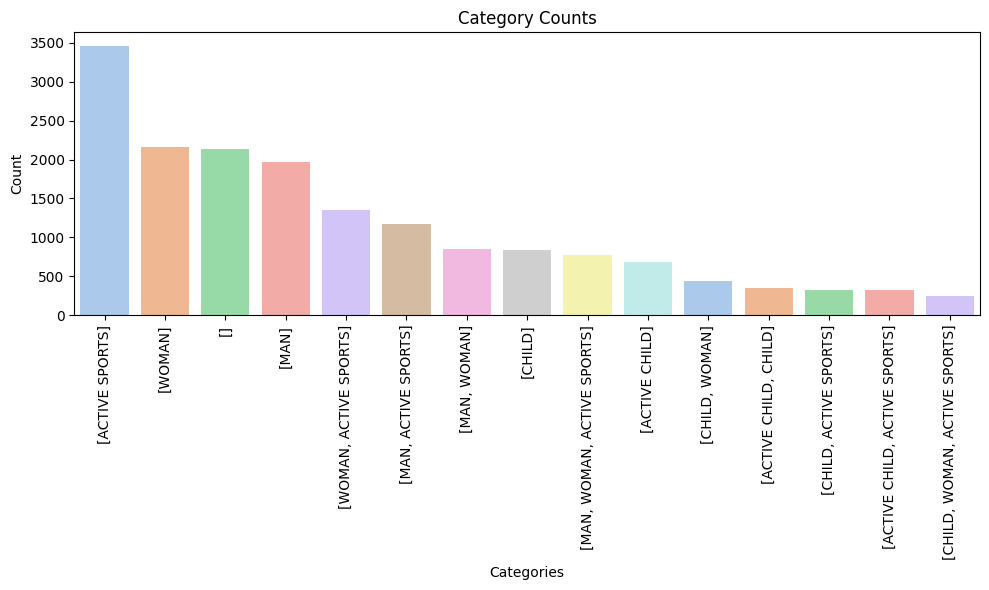

In [ ]:
## interested_in_categories_12_eng 항목이 너무 많아서 top 15 기준으로 sort 이후 다시 진행
nested_categories_count = flo_data['interested_in_categories_12_eng'].value_counts()[:15]

categories = list(nested_categories_count.index)
counts = list(nested_categories_count.values)

plt.figure(figsize = (10, 6))
sns.barplot(x = categories, y = counts, palette = 'pastel')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title("Category Counts")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()




# 고객 행동 분석 - 고객 특성 파악하기 - 주문량 & 주문 금액 관점
- 주문량과 주문 금액 관점 : 주문량
    - 주문량 분포 확인 : .info()
    - Boxplot을 통한 이상치 파악
    - 이상치 필터링 위한 함수 생성 및 제거
    - 분포 재확인
    - 막대그래프로 분포 재확인


- 주문량과 주문 금액 관점 : 주문 금액
    - 분포 확인 : .info()
    - Boxplot 통한 이상치 파악
    - 이상치 필터링 위한 함수 생성 및 제거
    - KDE 곡선을 통한 분포 파악
    - 주문량과 주문금액의 관계 시각화 : groupby
        - 산점도, 라인그래프
- 주문량과 주문 금액 관점 : 주문량과 주문 금액 관계




In [ ]:
## 주문량과 주문금액
## max : 202
flo_data['order_num_total'].describe()


,order_num_total
count,19945.000000
mean,5.024768
std,4.742707
min,2.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,202.000000


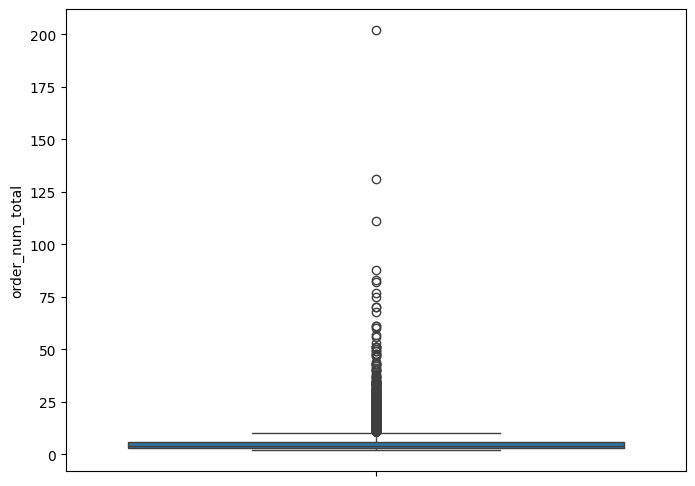

In [ ]:
plt.figure(figsize = (8 , 6))
sns.boxplot(data = flo_data, y = 'order_num_total')
plt.show()

In [ ]:
## outlier 제거를 위한 함수 생성

def remove_outlier (df, column) :
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
## 기존 원본 데이터에 할당
flo_data = remove_outlier(flo_data, 'order_num_total')


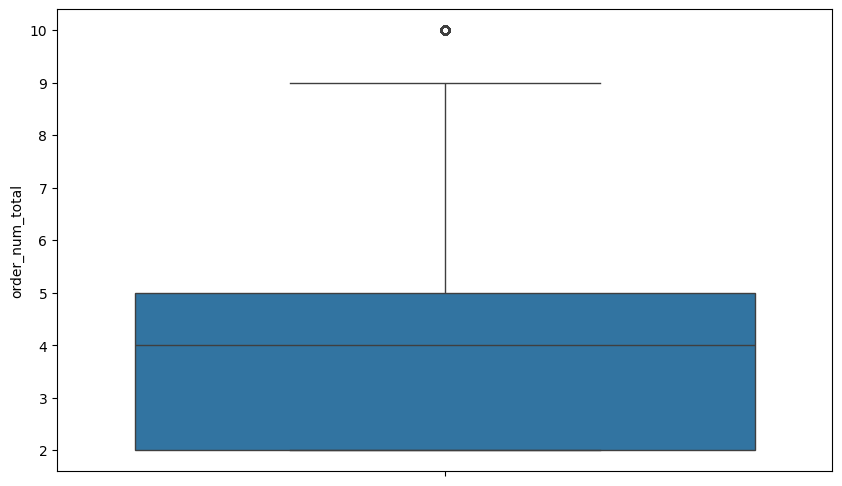

In [ ]:
flo_data['order_num_total'].describe()

plt.figure(figsize = (10, 6))
sns.boxplot(data = flo_data, y = 'order_num_total')
plt.show()

In [ ]:
data = flo_data['order_num_total'].value_counts().reset_index()
data

,order_num_total,count
0,2.0,4717
1,3.0,4377
2,4.0,3127
3,5.0,2145
4,6.0,1515
5,7.0,1053
6,8.0,693
7,9.0,529
8,10.0,390


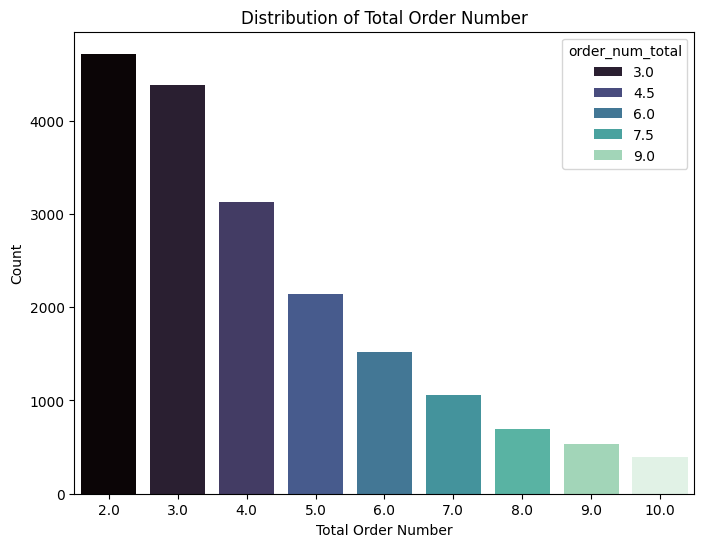

In [ ]:
## 2 count 부터 시작하는 점에 착안, 무조건 추가 주문이 진행되는 점 확인
plt.figure(figsize = (8, 6))
sns.barplot(data = data, x = 'order_num_total', y = 'count', palette = 'mako', hue = 'order_num_total')
plt.xlabel('Total Order Number')
plt.ylabel('Count')
plt.title('Distribution of Total Order Number')
plt.show()

In [ ]:
## 주문 금액 관점에서는 어떤 특이점이 있을까

## 이상치 확인
flo_data['customer_value_total'].describe()


,customer_value_total
count,18546.000000
mean,622.497358
std,450.073646
min,44.980000
25%,326.750000
50%,511.875000
75%,800.552500
max,20706.340000


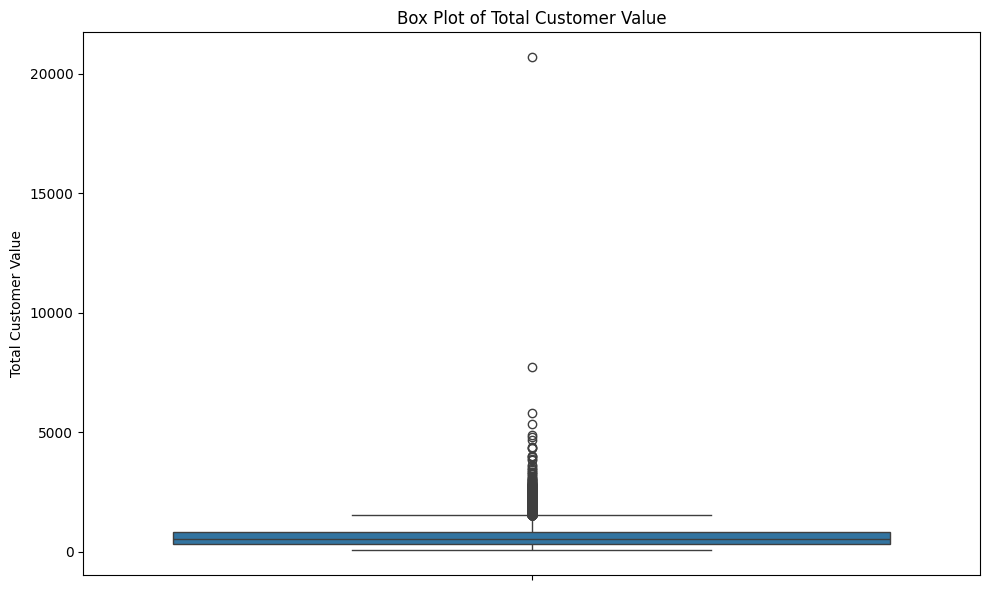

In [ ]:
## boxplot 이상치 확인
## 20000 외 이상치 다수 확인
plt.figure(figsize = (10, 6))
sns.boxplot(data = flo_data, y = 'customer_value_total')
plt.ylabel('Total Customer Value')
plt.title('Box Plot of Total Customer Value')

plt.tight_layout()
plt.show()

In [ ]:
## 이상치 제거 진행
flo_data = remove_outlier(flo_data, 'customer_value_total')


In [ ]:
# 통계값 재확인
flo_data['customer_value_total'].describe()


,customer_value_total
count,17812.000000
mean,566.921361
std,316.530524
min,44.980000
25%,319.970000
50%,495.915000
75%,756.425000
max,1510.080000


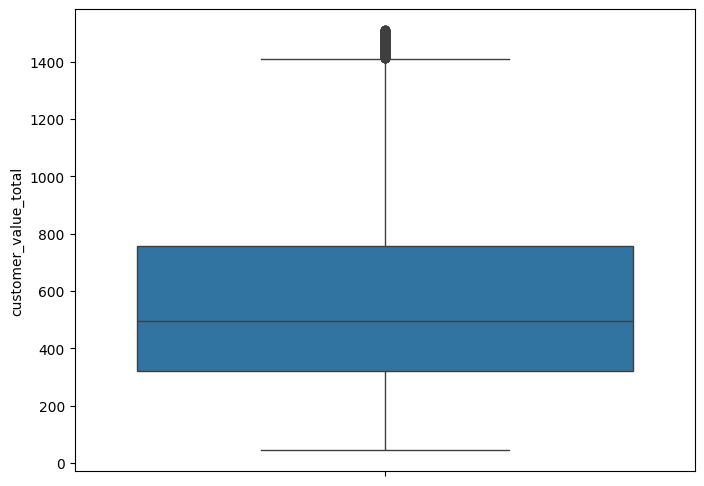

In [ ]:
## boxplot 재확인
plt.figure(figsize = (8, 6))
sns.boxplot(data = flo_data, y = 'customer_value_total')
plt.show()

Text(0.5, 1.0, 'Distribution of Total Customer Value')

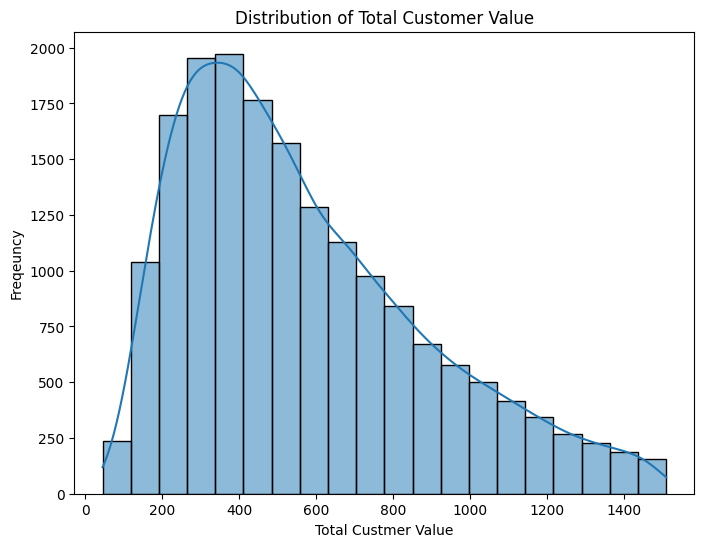

In [ ]:
## KDE 그래프를 통한 분포 확인
## 20개 구간 기준 구간별 빈도 파악 : 200 ~ 500 사이 구간에 가장 많은 고객 분포를 확인할 수 있었습니다.
plt.figure(figsize = (8, 6))
sns.histplot(data = flo_data, x = 'customer_value_total', bins = 20, kde = True) # 여기서 바로 bin을 씌워서 진행하는 점 체크
plt.xlabel('Total Custmer Value')
plt.ylabel('Freqeuncy')
plt.title('Distribution of Total Customer Value')


In [ ]:
## 그럼 주문량과 주문금액 간의 관계는 어떨까
## scatterplot
flo_data[['order_num_total', 'customer_value_total']]

,order_num_total,customer_value_total
0,5.0,939.37
2,5.0,585.32
3,2.0,121.97
4,2.0,209.98
5,3.0,200.86
...,...,...
19940,3.0,401.96
19941,2.0,390.47
19942,3.0,632.94
19943,6.0,1009.77


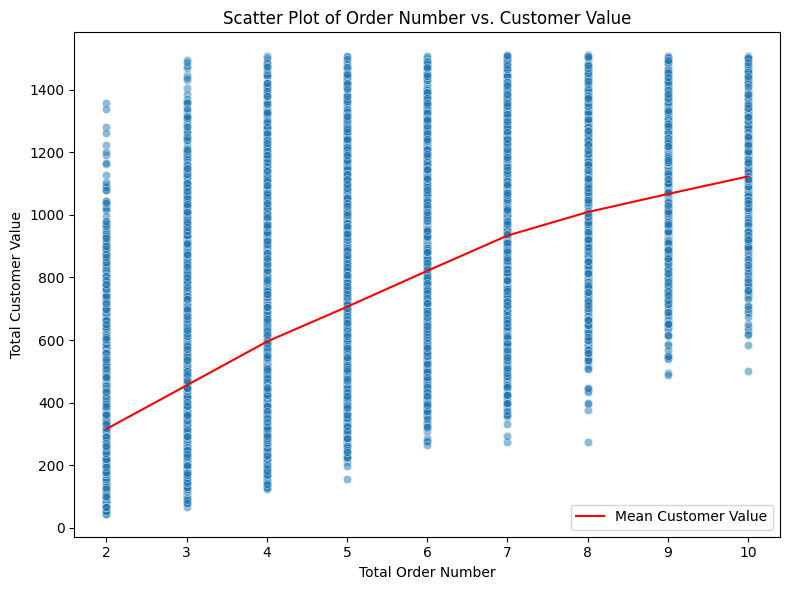

In [ ]:
## 주문횟수가 오를수록 평균 주문 금액은 증가하는 추세 확인
## 다만 주문횟수가 증가하더라도, 평균 주문 금액의 상한이 올라가지는 않는 것으로 확인
## 나아가 평균 주문 금액의 분포 역시 증가하는 트랜드를 보이는 점을 확인

## groupby
order_value_avg = flo_data.groupby('order_num_total')['customer_value_total'].mean().reset_index()

## plot

## scatterplot
plt.figure(figsize = (8, 6))
sns.scatterplot(data = flo_data, x = 'order_num_total', y = 'customer_value_total', alpha = 0.5)
plt.xlabel("Total Order Number")
plt.ylabel("Total Customer Value")
plt.title("Scatter Plot of Order Number vs. Customer Value")

## lineplot
sns.lineplot(data = order_value_avg, x = 'order_num_total', y = 'customer_value_total', color = 'red', ls = '-', label = 'Mean Customer Value')
plt.legend()

plt.tight_layout()
plt.show()

# 고객 행동 분석 - 고객 특성 파악하기 - 주문 주기 관점
- 고객 특성 파악하기  : 주문 주기 관점
    - 평균 구매 주기 지표 산출
        - 평균 구매 주기 = (마지막 주문일 - 최초 주문일) / 총 주문 횟수
        - .dt.days
        - 기초통계 통해 이상치 파악
        - boxplot 통해 이상치를 시각화
        - 이상치 제거 진행
        - 제거 후 기초통계
        - 히스토그램으로 분포 확인
    - 평균 구매주기와 총 주문 금액의 상관관계 파악
        - scatterplot 으로 진행 시 뚜렷한 패턴을 나타내지 않아, 구간으로 나눈 후 진행하는 방향
            - bins



In [ ]:
## 평균 구매 주기 지표 생성
## 데이터가 timedelta 형식으로 들어가게 됨
flo_data['average_order_period'] = (flo_data['last_order_date'] - flo_data['first_order_date']) / flo_data['order_num_total']
flo_data['average_order_period']


,average_order_period
0,23 days 19:12:00
2,73 days 04:48:00
3,5 days 12:00:00
4,291 days 00:00:00
5,282 days 00:00:00
...,...
19940,96 days 00:00:00
19941,148 days 00:00:00
19942,207 days 00:00:00
19943,114 days 20:00:00


In [ ]:
## 컬럼에서 숫자만 추출, 이후 신규 컬럼에 반영
## max값이 매우 높아 이상치 추가 확인 진행 필요
flo_data['average_order_period_days'] = flo_data['average_order_period'].dt.days # 며칠인지? 값을 뽑아주는 것
flo_data['average_order_period_days'].describe()


,average_order_period_days
count,17812.000000
mean,171.662924
std,142.934339
min,0.000000
25%,86.000000
50%,137.000000
75%,213.000000
max,1302.000000


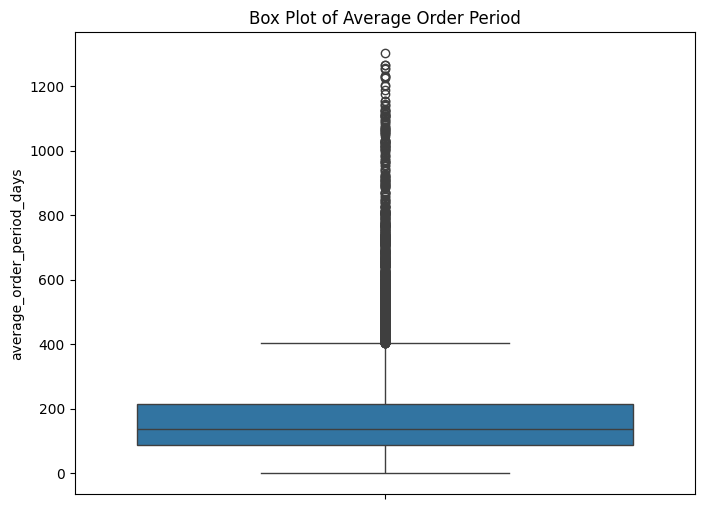

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = flo_data, y = 'average_order_period_days')
plt.title('Box Plot of Average Order Period')
plt.show()

In [ ]:
## 이상치 제거 후 기존 데이터프레임에 반영
flo_data = remove_outlier(flo_data, 'average_order_period_days')

In [ ]:
flo_data['average_order_period_days'].describe()

,average_order_period_days
count,16817.000000
mean,145.813879
std,85.964874
min,0.000000
25%,84.000000
50%,130.000000
75%,195.000000
max,403.000000


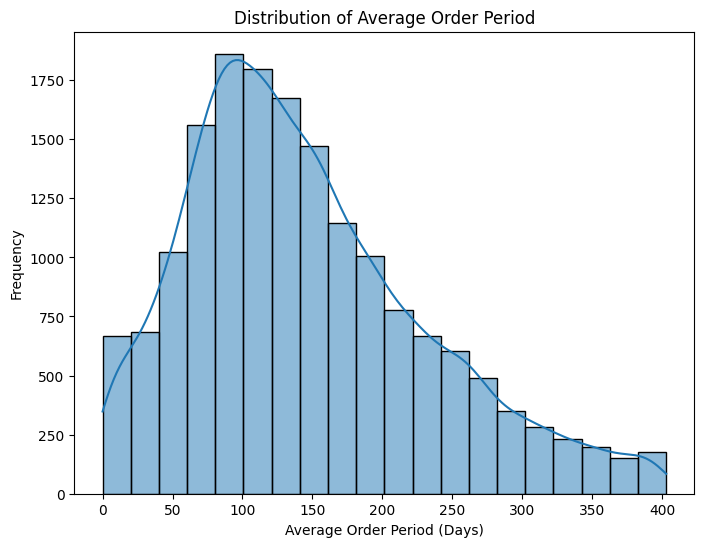

In [ ]:
## 구간을 나눈 뒤 histogram으로 분포를 재확인
plt.figure(figsize = (8, 6))
sns.histplot(data = flo_data, x = 'average_order_period_days', bins = 20, kde = True)
plt.xlabel('Average Order Period (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Order Period')
plt.show()

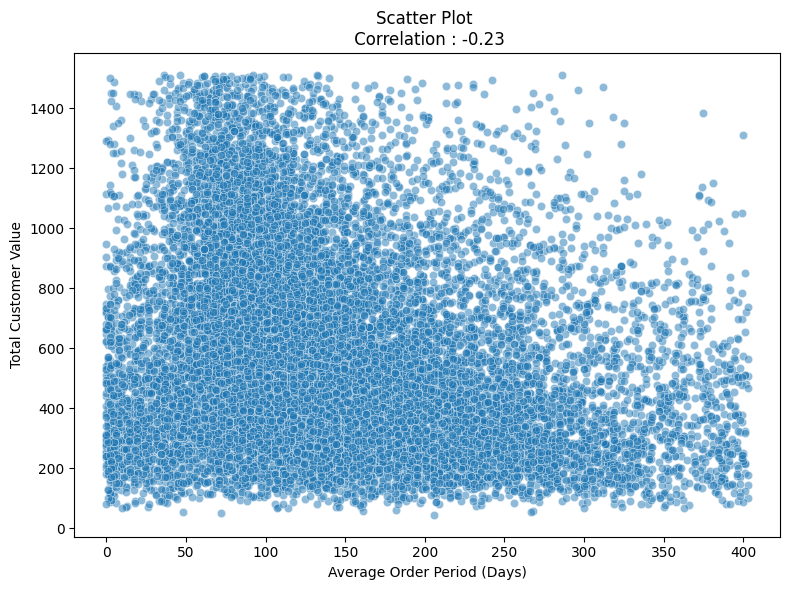

In [ ]:
## 평균 구매 주기에 따라, 평균 구매 금액이 영향을 받는지, 상관성이 있는지 파악
## 상관계수는 -0.23 으로 음의 상관관계를 보인다고 나타내고 있으나, scatterplot 상에서는 음의 상관관계가 뚜렷한 scatterplot을 확인하기는 어렵다

correlation = flo_data['average_order_period_days'].corr(flo_data['customer_value_total'])

plt.figure(figsize = (8, 6))
sns.scatterplot(data = flo_data, x = 'average_order_period_days', y = 'customer_value_total', alpha = 0.5)
plt.xlabel('Average Order Period (Days)')
plt.ylabel('Total Customer Value')
plt.title(f'Scatter Plot \n Correlation : {correlation : .2f}')
plt.tight_layout()
plt.show()

In [ ]:
## bins 나누어 비교 진행

## 버전 업데이트 후 권장 메시지 에 대한 무시 처리
import warnings
warnings.filterwarnings('ignore')



In [ ]:
bins = 20

flo_data['order_period_category'] = pd.cut(flo_data['average_order_period_days'], bins = bins)

for group in sorted(flo_data['order_period_category'].unique()) :
    print(group)

(-0.403, 20.15]
(20.15, 40.3]
(40.3, 60.45]
(60.45, 80.6]
(80.6, 100.75]
(100.75, 120.9]
(120.9, 141.05]
(141.05, 161.2]
(161.2, 181.35]
(181.35, 201.5]
(201.5, 221.65]
(221.65, 241.8]
(241.8, 261.95]
(261.95, 282.1]
(282.1, 302.25]
(302.25, 322.4]
(322.4, 342.55]
(342.55, 362.7]
(362.7, 382.85]
(382.85, 403.0]


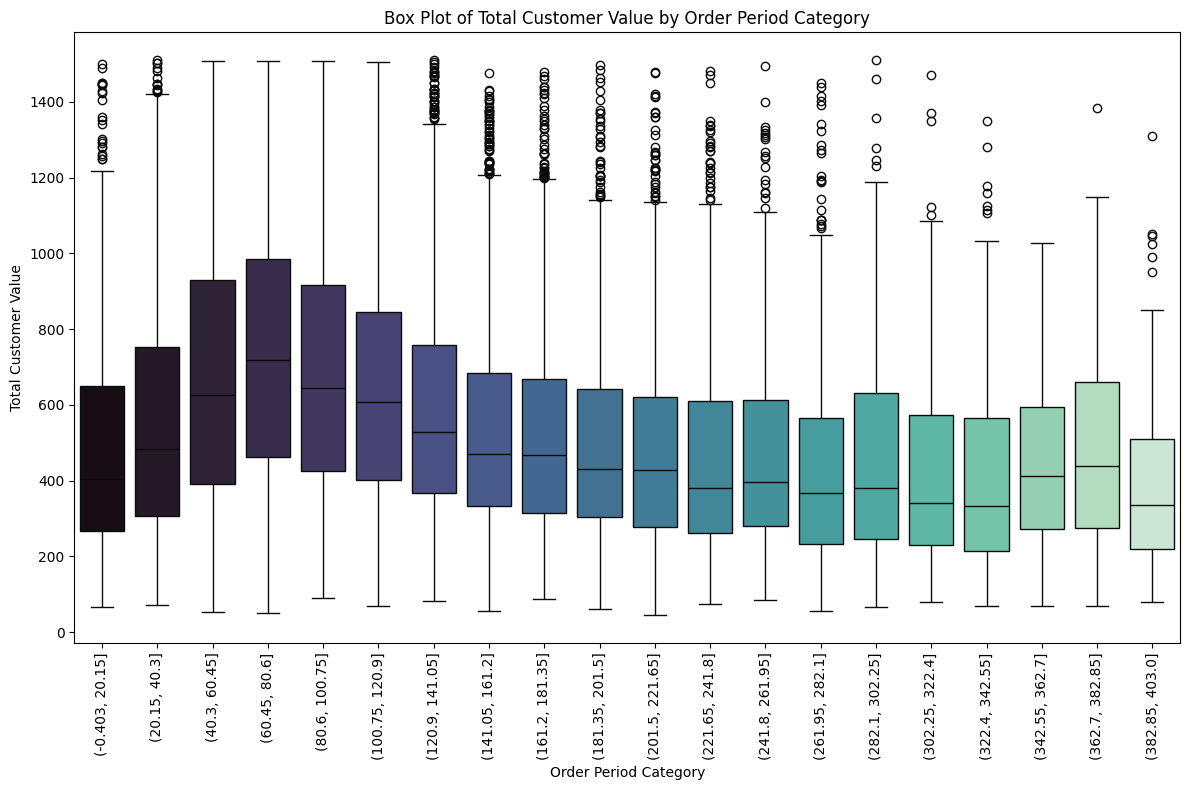

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = flo_data, x = 'order_period_category', y = 'customer_value_total', palette = 'mako')
plt.xlabel('Order Period Category')
plt.ylabel('Total Customer Value')
plt.title('Box Plot of Total Customer Value by Order Period Category')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

## 3~6 구간에서 가장 많은 고객 분포를 확인할 수 있었습니다.
## 주변 구간 (1~2 또는 7 ~ 10) 이 3~6 구간으로 포섭할 수 있는 방법에 대해 고민을 해봐야 하는 부분이 될 것 같습니다.


# 고객 행동 분석 - 고객 특성 파악하기 - 이탈 시점 관점
- 고객 특성 파악하기  : 이탈 시점 관점
    - 채널
    - 카테고리와 온오프라인 주문 횟수
    

In [ ]:
## 80일 이후 다시 구매하러 오지 않는 시점을 이탈 시점이라고 정의하고, 이 이후 3 구간의 속한 고객에게 다시 재구매를 일으키도록 하고 싶다


## top_group 선정
groups = sorted(flo_data['order_period_category'].unique())
top_group = groups[3]
target_group = groups[4:7] # 최고 거래액 이후 3개 bins
print(top_group, target_group)

(60.45, 80.6] [Interval(80.6, 100.75, closed='right'), Interval(100.75, 120.9, closed='right'), Interval(120.9, 141.05, closed='right')]


In [ ]:
## 위 group 조건 마스킹한 데이터프레임 생성
top_group_df = flo_data[flo_data['order_period_category'] == top_group]
target_group_df = flo_data[flo_data['order_period_category'].isin(target_group)]

In [ ]:
## 비율을 나타낼 수 있는 함수 생성

def get_rate(df, column, num = False) :
    total = len(df)
    if num :
        return df[column].value_counts()[:num] / total
    return df[column].value_counts() / total


In [ ]:
# 각 그룹별 채널별 분포 정보를 담은 변수 생성
top_group_channel_distribution = get_rate(top_group_df, 'last_order_channel').sort_values()
target_group_channel_distribution = get_rate(target_group_df, 'last_order_channel').sort_values()


In [ ]:
combined_data = pd.DataFrame({'Top Group' : top_group_channel_distribution, "Target Group" : target_group_channel_distribution})
combined_data = combined_data.reset_index().rename(columns = {'last_order_channel' : 'Channel'}).fillna(0) # 혹시나 있을 결측치 처리를 위해 fillna 추가
combined_data

,Channel,Top Group,Target Group
0,Desktop,0.066068,0.075394
1,Ios App,0.101988,0.087209
2,Mobile,0.119949,0.158290
3,Offline,0.320718,0.293511
4,Android App,0.391276,0.385596


In [ ]:
## melt 메서드를 통한 데이터프레임 재구조화
# var_name = 'Group', value_name = 'Distribution'
combined_data.melt(id_vars = 'Channel')

,Channel,variable,value
0,Desktop,Top Group,0.066068
1,Ios App,Top Group,0.101988
2,Mobile,Top Group,0.119949
3,Offline,Top Group,0.320718
4,Android App,Top Group,0.391276
5,Desktop,Target Group,0.075394
6,Ios App,Target Group,0.087209
7,Mobile,Target Group,0.158290
8,Offline,Target Group,0.293511
9,Android App,Target Group,0.385596


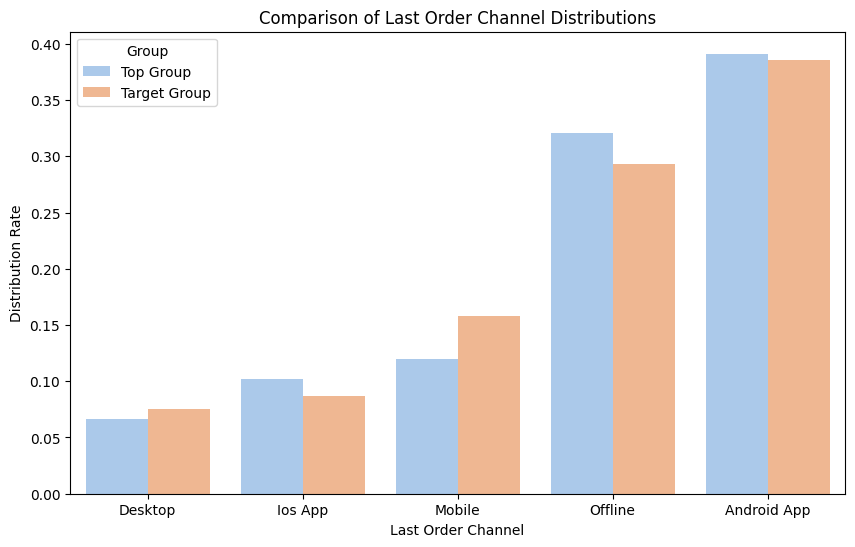

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(data = combined_data.melt(id_vars = 'Channel'), x = 'Channel', y = 'value', hue = 'variable', palette = 'pastel')
plt.xlabel('Last Order Channel')
plt.ylabel('Distribution Rate')
plt.title('Comparison of Last Order Channel Distributions')
plt.legend(title = 'Group')
plt.show()


In [ ]:
# 각 그룹별 카테고리별 분포 정보를 담은 변수 생성
top_group_category_distribution = get_rate(top_group_df, 'interested_in_categories_12', 10)
target_group_category_distribution = get_rate(target_group_df, 'interested_in_categories_12', 10)

# combining
combined_data = pd.DataFrame({'Top Group' : top_group_category_distribution, "Target Group" : target_group_category_distribution})
combined_data = combined_data.reset_index().rename(columns = {'interested_in_categories_12' : 'Category'}).fillna(0) # 혹시나 있을 결측치 처리를 위해 fillna 추가
combined_data

,Category,Top Group,Target Group
0,[AKTIFCOCUK],0.026299,0.035446
1,[AKTIFSPOR],0.134060,0.181733
2,"[COCUK, AKTIFSPOR]",0.022450,0.000000
3,[COCUK],0.032713,0.046324
4,"[ERKEK, AKTIFSPOR]",0.087235,0.066204
5,"[ERKEK, KADIN, AKTIFSPOR]",0.075690,0.035259
6,"[ERKEK, KADIN]",0.055164,0.048012
7,[ERKEK],0.094291,0.102213
8,"[KADIN, AKTIFSPOR]",0.093008,0.072581
9,[KADIN],0.093008,0.102588


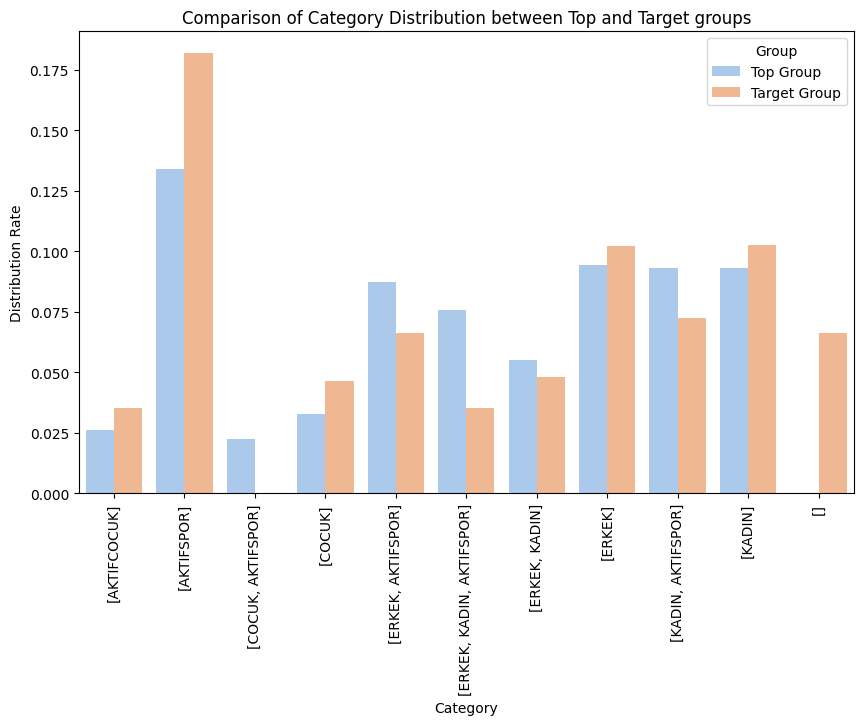

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(data = combined_data.melt(id_vars = 'Category'), x = 'Category', y = 'value', hue = 'variable', palette = 'pastel')
plt.xlabel('Category')
plt.ylabel('Distribution Rate')
plt.title('Comparison of Category Distribution between Top and Target groups')
plt.legend(title = 'Group')
plt.xticks(rotation = 90)
plt.show()

## top group 대비, target group 에서는 혼합 카테고리에서의 구매가 다소 적은 점을 파악, target group 의 혼합 카테고리 구매 유도의 필요성을 인식


In [ ]:
## online, offline 기준 주문횟수는 어느 정도인지 파악

top_group_order_num_online_distribution = get_rate(top_group_df, 'order_num_total_ever_online', 10)
target_group_order_num_online_distribution = get_rate(target_group_df, 'order_num_total_ever_online', 10)

top_group_order_num_offline_distribution = get_rate(top_group_df, 'order_num_total_ever_offline', 10)
target_group_order_num_offline_distribution = get_rate(target_group_df, 'order_num_total_ever_offline', 10)

combined_data_online = pd.DataFrame({'Top Group': top_group_order_num_online_distribution, 'Target Group': target_group_order_num_online_distribution})
combined_data_online = combined_data_online.reset_index().rename(columns={'order_num_total_ever_online':'Order Num Online'}).fillna(0)

combined_data_offline = pd.DataFrame({'Top Group': top_group_order_num_offline_distribution, 'Target Group': target_group_order_num_offline_distribution})
combined_data_offline = combined_data_offline.reset_index().rename(columns={'order_num_total_ever_offline':'Order Num Offline'}).fillna(0)


In [ ]:
display(combined_data_online)
display(combined_data_offline)

,Order Num Online,Top Group,Target Group
0,1.0,0.290571,0.379782
1,2.0,0.202053,0.244749
2,3.0,0.157152,0.166917
3,4.0,0.134702,0.093398
4,5.0,0.091084,0.058702
5,6.0,0.060936,0.022693
6,7.0,0.039769,0.016504
7,8.0,0.018602,0.012191
8,9.0,0.005131,0.005064


,Order Num Offline,Top Group,Target Group
0,1.0,0.438101,0.432671
1,2.0,0.259140,0.272693
2,3.0,0.119307,0.154914
3,4.0,0.084670,0.083646
4,5.0,0.049391,0.038260
5,6.0,0.019243,0.012378
6,7.0,0.019243,0.003938
7,8.0,0.007056,0.001500
8,9.0,0.003849,0.000000


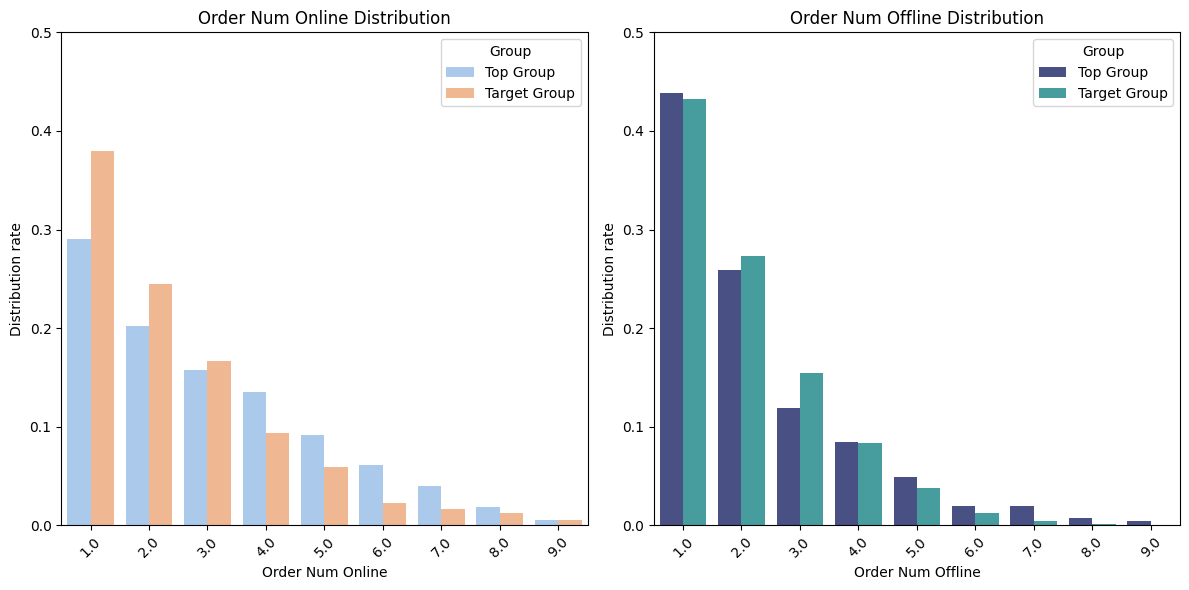

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=combined_data_online.melt(id_vars='Order Num Online'), x='Order Num Online', y='value', hue='variable', palette='pastel')
plt.xlabel('Order Num Online')
plt.ylabel('Distribution rate')
plt.ylim(0, 0.5)
plt.title('Order Num Online Distribution')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.subplot(1,2,2)
sns.barplot(data=combined_data_offline.melt(id_vars='Order Num Offline'), x='Order Num Offline', y='value', hue='variable', palette='mako')
plt.xlabel('Order Num Offline')
plt.ylabel('Distribution rate')
plt.ylim(0, 0.5)
plt.title('Order Num Offline Distribution')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.tight_layout()
plt.show()

## Online 부문에서는 4회 이상부터는 Top Group 에서 높은 비율을 차지,
## Offline 부문에서도 비슷한 경향을 보이는 것을 화인
## 다만 그 비중의 차이가 그렇게 크지 않은 점을 감안하여 자료 분석을 진행